# Training MNIST with CNN


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from keras.utils import np_utils
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from keras.preprocessing.image import img_to_array
import numpy as np
from sklearn.metrics import confusion_matrix
import sklearn
import cv2
print("[INFO] All packages imported successfully")


Using TensorFlow backend.


[INFO] All packages imported successfully


In [2]:
#Load MNIST dataset
mnist = tf.keras.datasets.mnist

(trainX, trainY), (testX, testY) = mnist.load_data()
trainX, testX = trainX / 255.0, testX / 255.0
print("[INFO] Original {} dataset of trainData shape {}".format("mnist",trainX.shape))
print("[INFO] Original {} dataset of trainLabels shape {}".format("mnist",trainY.shape))
print("[INFO] Original {} dataset of testData shape {}".format("mnist",testX.shape))
print("[INFO] Original {} dataset of testLabels shape {}".format("mnist",testY.shape))
epochs_num=10

[INFO] Original mnist dataset of trainData shape (60000, 28, 28)
[INFO] Original mnist dataset of trainLabels shape (60000,)
[INFO] Original mnist dataset of testData shape (10000, 28, 28)
[INFO] Original mnist dataset of testLabels shape (10000,)


In [3]:
#get labels from dataset
labels =  sklearn.utils.multiclass.unique_labels(trainY)
labels=labels.astype(str)
print(labels)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [4]:
#function to draw grid of images
def drarwGridOfImagesFromImagesData(images):

  # Parameters for our graph; we'll output images in a 4x4 configuration
  nrows = 4
  ncols = 4

  pic_index = 0 # Index for iterating over images

  #display a batch of 4*4 pictures

  # Set up matplotlib fig, and size it to fit 4x4 pics
  fig = plt.gcf()
  fig.set_size_inches(ncols*4, nrows*4)

  for i in range(16):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    img = images[i]

    plt.imshow(img)

  plt.show()


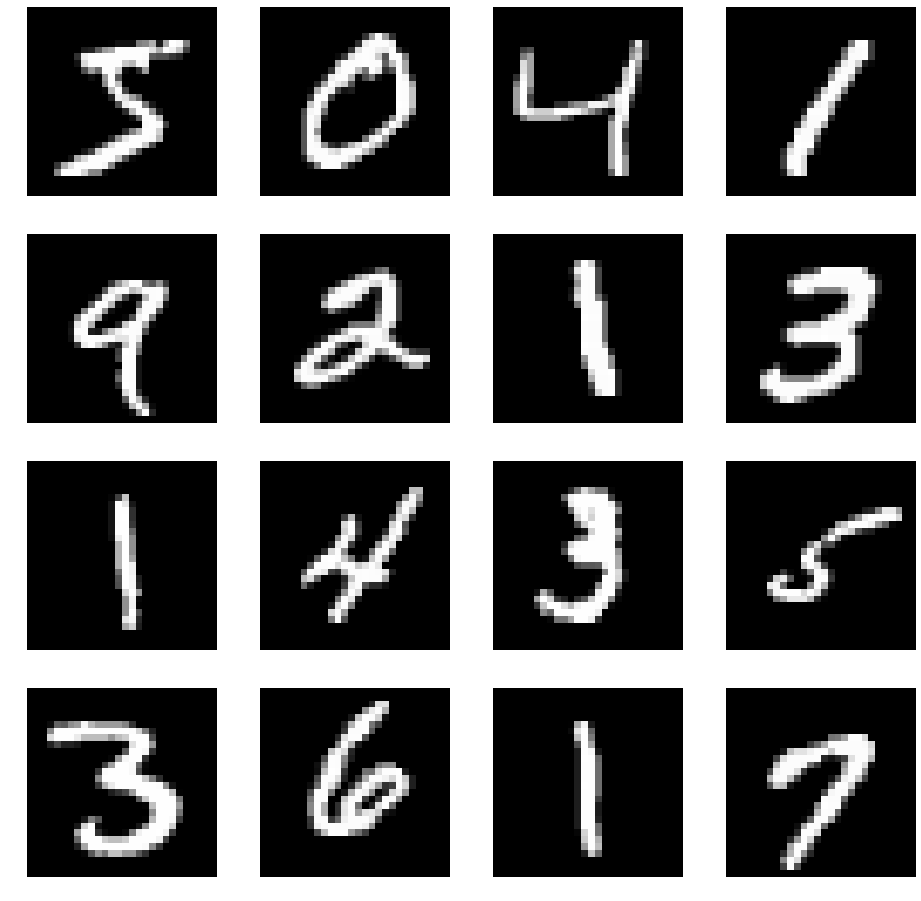

In [10]:
#Prepare and draw images in grid 
images=[]
for  i in range(16):
    image=trainX[i]
    image = cv2.merge([image] * 3)
    images.append(image)

drarwGridOfImagesFromImagesData(images)

In [5]:
trainX = np.expand_dims(trainX, axis=-1)
testX = np.expand_dims(testX, axis=-1)
print("[INFO]  trainData shape {}".format(trainX.shape))
print("[INFO]  testData shape {}".format(testX.shape))

[INFO]  trainData shape (60000, 28, 28, 1)
[INFO]  testData shape (10000, 28, 28, 1)


In [6]:
model = tf.keras.models.Sequential([
# Note the input shape is the desired size of the image 150x150 with 3 bytes color
tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28, 1)),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2), 
tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
tf.keras.layers.MaxPooling2D(2,2),
# Flatten the results to feed into a DNN
tf.keras.layers.Flatten(), 
# 512 neuron hidden layer
tf.keras.layers.Dense(512, activation='relu'), 
tf.keras.layers.Dense(10, activation="softmax")  ])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print("[INFO] model compiled successfully")

[INFO] model compiled successfully


In [10]:
history=model.fit(trainX, trainY, validation_data=(testX, testY),epochs=epochs_num)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 43s 712us/sample - loss: 0.2162 - accuracy: 0.9319 - val_loss: 0.0945 - val_accuracy: 0.9709
Epoch 2/10
60000/60000 [==============================] - 37s 622us/sample - loss: 0.0775 - accuracy: 0.9769 - val_loss: 0.0957 - val_accuracy: 0.9688
Epoch 3/10
60000/60000 [==============================] - 40s 668us/sample - loss: 0.0559 - accuracy: 0.9827 - val_loss: 0.0530 - val_accuracy: 0.9830
Epoch 4/10
60000/60000 [==============================] - 44s 726us/sample - loss: 0.0455 - accuracy: 0.9858 - val_loss: 0.0535 - val_accuracy: 0.9835
Epoch 5/10
60000/60000 [==============================] - 44s 727us/sample - loss: 0.0370 - accuracy: 0.9883 - val_loss: 0.0481 - val_accuracy: 0.9870
Epoch 6/10
60000/60000 [==============================] - 43s 714us/sample - loss: 0.0320 - accuracy: 0.9893 - val_loss: 0.0536 - val_accuracy: 0.9849
Epoch 7/10
60000/60000 [====================

In [11]:
#draw training curves	
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]   
epochs   = range(len(acc)) # Get number of epochs
plt.style.use("ggplot")

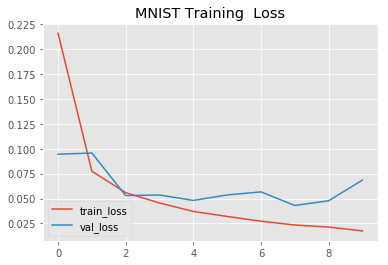

In [12]:
plt.figure()
plt.plot(epochs, loss, label="train_loss")
plt.plot(epochs, val_loss, label="val_loss")
plt.title("MNIST Training  Loss")  
epochs   = range(len(acc)) # Get number of epochs
plt.style.use("ggplot")
plt.legend(loc="lower left")
plt.show()


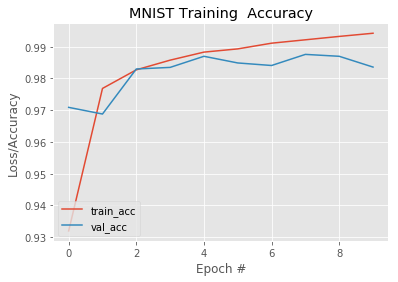

In [13]:
plt.figure()
plt.title("MNIST Training  Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
epochs   = range(len(acc)) # Get number of epochs
plt.plot(epochs, acc, label="train_acc")
plt.plot(epochs, val_acc, label="val_acc")
plt.style.use("ggplot")
plt.legend(loc="lower left")
plt.show()


In [15]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
y_pred=predictions.argmax(axis=1)
print(classification_report(testY,y_pred, target_names=labels))
print(confusion_matrix(testY, y_pred))
print(labels)

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.95      0.99      0.97      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.97      0.98       982
           5       1.00      0.97      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.97      0.99      0.98      1009

   micro avg       0.98      0.98      0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

[[ 975    0    1    0    0    0    1    1    0    2]
 [   0 1127    0    2    1    0    3    2    0    0]
 [   3    0 1021    2    0    0    2    4    0    0]
 [   0    0    2 1008    0    0    0    0    0    0]
